## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path, encoding="utf")
study_results = pd.read_csv(study_results_path, encoding="utf")

# Combine the data into a single dataset

df = pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")

print(df.shape)


# Display the data table for preview

df.head(35)

(1893, 8)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.

df["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

bool_s = df.duplicated(subset=["Mouse ID", "Timepoint"])

dupes_df = df.loc[bool_s, :]

keepers_df = df.loc[~bool_s, :]

dupes_df["Mouse ID"]

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

del_data = df[df["Mouse ID"] == "g989"]
del_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = df[df["Mouse ID"] != "g989"]

clean_df.tail(35)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1858,z314,Stelasyn,Female,21,28,0,45.000000,0
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1860,z435,Propriva,Female,12,26,0,45.000000,0
1861,z435,Propriva,Female,12,26,5,47.115980,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1863,z581,Infubinol,Female,24,25,0,45.000000,0
1864,z581,Infubinol,Female,24,25,5,49.273092,1
1865,z581,Infubinol,Female,24,25,10,50.478750,2
1866,z581,Infubinol,Female,24,25,15,51.196304,2
1867,z581,Infubinol,Female,24,25,20,51.807944,2


In [6]:
# Checking the number of mice in the clean DataFrame.

clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

df = clean_df.copy()

print(df["Drug Regimen"].value_counts())

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64


In [8]:
tum_s = df["Tumor Volume (mm3)"]

print(tum_s)

0       45.000000
1       38.825898
2       35.014271
3       34.223992
4       32.997729
          ...    
1888    63.145652
1889    65.841013
1890    69.176246
1891    70.314904
1892    73.867845
Name: Tumor Volume (mm3), Length: 1880, dtype: float64


In [9]:
drugs = df["Drug Regimen"].unique()

print(drugs)

['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']


In [10]:
# # Need to make 5 unique Series with all of the stats summ data, then add 
# # these to a new DF


by_reg_dict = {}

for drug in drugs:
      
    drug_s = df.loc[  (df['Drug Regimen'] == drug), "Tumor Volume (mm3)" ]
    
    by_reg_dict[drug] = drug_s

In [11]:
tum_data = by_reg_dict["Placebo"]

tum_mean = tum_data.mean()
tum_median = np.median(tum_data)
tum_variance = np.var(tum_data)
tum_std = np.std(tum_data)
tum_sem = st.sem(tum_data)
    
placebo_s = pd.Series([tum_mean, tum_median, tum_variance, tum_std, tum_sem])

print(placebo_s)

0    54.033581
1    52.288934
2    60.830138
3     7.799368
4     0.581331
dtype: float64


In [12]:
final_reg_dict = {}
final_reg_df = pd.DataFrame()


for drug_name,tum_data in by_reg_dict.items():
    
    tum_mean = tum_data.mean()
    tum_median = np.median(tum_data)
    tum_variance = np.var(tum_data)
    tum_std = np.std(tum_data)
    tum_sem = st.sem(tum_data)
    
    final_reg_dict[drug_name] = pd.Series([tum_mean, tum_median, tum_variance, tum_std, tum_sem])
    

final_reg_df = pd.DataFrame(final_reg_dict)
summ_df = final_reg_df.copy()

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summ_df.index = ["mean","median", "var", "std", "sem"]
summ_df

,Ramicane,Capomulin,Infubinol,Placebo,Ceftamin,Stelasyn,Zoniferol,Ketapril,Propriva,Naftisol
mean,40.216745,40.675741,52.884795,54.033581,52.591172,54.233149,53.236507,55.235638,52.320930,54.331565
median,40.673236,41.557809,51.820584,52.288934,51.776157,52.431737,51.818479,53.698743,50.446266,52.509285
var,23.383692,24.839296,42.886388,60.830138,39.069446,59.122106,48.266689,68.188930,43.555716,65.817708
std,4.835669,4.983904,6.548770,7.799368,6.250556,7.689090,6.947423,8.257659,6.599675,8.112811
sem,0.320955,0.329346,0.492236,0.581331,0.469821,0.573111,0.516398,0.603860,0.544332,0.596466


In [14]:
# Using the aggregation method, produce the same summary statistics in a single line

single_line_df = df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", np.var, np.std, st.sem]})
single_line_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

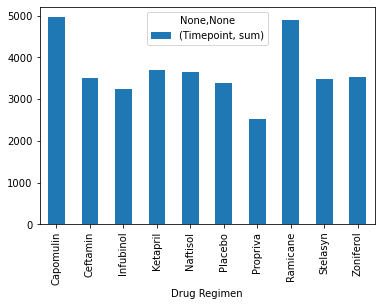

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
df
sum_tp = df.groupby("Drug Regimen").agg({"Timepoint": ["sum"]})
sum_tp.plot(kind="bar")

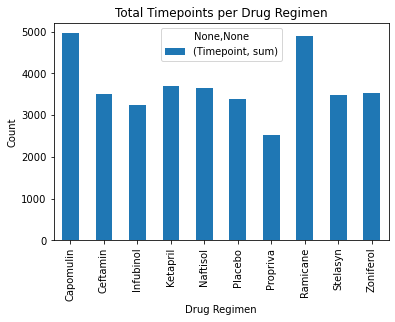

<Figure size 432x288 with 0 Axes>

In [16]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

df
sum_tp = df.groupby("Drug Regimen").agg({"Timepoint": ["sum"]})

sum_tp_chart = sum_tp.plot(kind="bar", title="Total Timepoints per Drug Regimen")
sum_tp_chart.set_xlabel("Drug Regimen")
sum_tp_chart.set_ylabel("Count")

plt.show()
plt.tight_layout()

<AxesSubplot:ylabel='Mouse ID'>

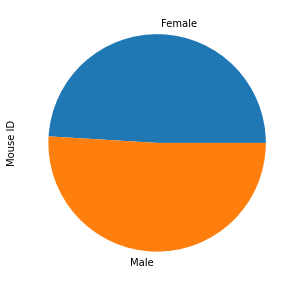

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

df
by_sex = df.groupby("Sex")["Mouse ID"].count()

by_sex.plot.pie(y="by_sex", figsize=(5, 5))

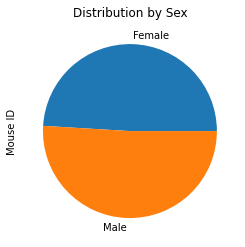

<Figure size 432x288 with 0 Axes>

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

df
by_sex = df.groupby("Sex")["Mouse ID"].count()

by_sex_chart = by_sex.plot(kind="pie", title="Distribution by Sex")

plt.show()
plt.tight_layout()

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


df
by_drug = df.groupby(["Mouse ID", "Drug Regimen"])[["Timepoint", "Tumor Volume (mm3)"]].max()

new_df = by_drug.sort_values(by="Drug Regimen").reset_index()


capomulin_df = new_df[new_df["Drug Regimen"] == "Capomulin"]

ramicane_df = new_df[new_df["Drug Regimen"] == "Ramicane"]

infubinol_df = new_df[new_df["Drug Regimen"] == "Infubinol"]

ceftamin_df = new_df[new_df["Drug Regimen"] == "Ceftamin"]

In [20]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

# n/a

In [21]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)

# n/a

In [22]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
       
    # add subset 
    
    # Determine outliers using upper and lower bounds
    
capomulin_df.sort_values(by="Tumor Volume (mm3)").reset_index()
ramicane_df.sort_values(by="Tumor Volume (mm3)").reset_index()
infubinol_df.sort_values(by="Tumor Volume (mm3)").reset_index()
ceftamin_df.sort_values(by="Tumor Volume (mm3)").reset_index()

capomulin_tumors = capomulin_df["Tumor Volume (mm3)"].sort_values()
capomulin_tumors.name = "Capomulin Tumors"


ramicane_tumors = ramicane_df["Tumor Volume (mm3)"].sort_values()
ramicane_tumors.name = "Ramicane Tumors"


infubinol_tumors = infubinol_df["Tumor Volume (mm3)"].sort_values()
infubinol_tumors.name = "Infubinol Tumors"


ceftamin_tumors = ceftamin_df["Tumor Volume (mm3)"].sort_values()
ceftamin_tumors.name = "Ceftamin Tumors"


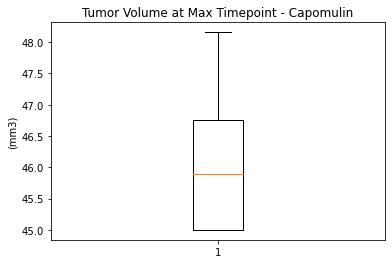

In [23]:
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume at Max Timepoint - Capomulin')
ax1.set_ylabel('(mm3)')
ax1.boxplot(capomulin_tumors)
plt.show()

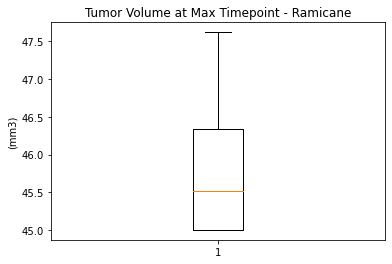

In [24]:
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume at Max Timepoint - Ramicane')
ax1.set_ylabel('(mm3)')
ax1.boxplot(ramicane_tumors)
plt.show()

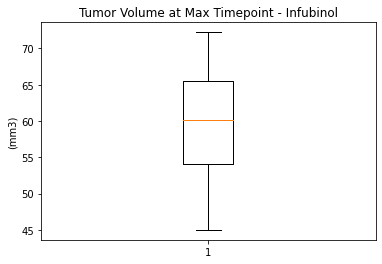

In [25]:
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume at Max Timepoint - Infubinol')
ax1.set_ylabel('(mm3)')
ax1.boxplot(infubinol_tumors)
plt.show()

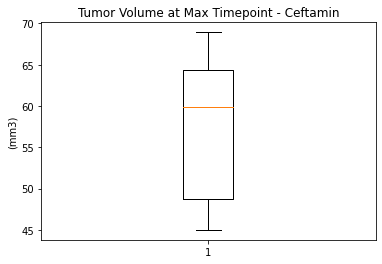

In [26]:
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume at Max Timepoint - Ceftamin')
ax1.set_ylabel('(mm3)')
ax1.boxplot(ceftamin_tumors)
plt.show()

In [27]:
def outliers_report(ser):
    
    quartiles = 0
    lowerq = 0
    upperq = 0
    iqr = 0
    lower_bound = 0
    upper_bound = 0
    
    print(f"OUTLIERS REPORT {ser.name}\n")
    quartiles = ser.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    print(f"The lower quartile is: {lowerq}")
    print(f"The upper quartile is: {upperq}")
    print(f"The interquartile range is: {iqr}")
    print(f"The the median is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    

In [28]:
outliers_report(capomulin_tumors)

OUTLIERS REPORT Capomulin Tumors

The lower quartile is: 45.0
The upper quartile is: 46.74900552
The interquartile range is: 1.7490055199999972
The the median is: 45.89372032 
Values below 42.376491720000004 could be outliers.
Values above 49.37251379999999 could be outliers.


In [29]:
outliers_report(ramicane_tumors)

OUTLIERS REPORT Ramicane Tumors

The lower quartile is: 45.0
The upper quartile is: 46.34383237
The interquartile range is: 1.3438323700000012
The the median is: 45.52187471 
Values below 42.984251445 could be outliers.
Values above 48.359580925 could be outliers.


In [30]:
outliers_report(infubinol_tumors)

OUTLIERS REPORT Infubinol Tumors

The lower quartile is: 54.04860769
The upper quartile is: 65.52574285
The interquartile range is: 11.477135160000003
The the median is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [31]:
outliers_report(ceftamin_tumors)    

OUTLIERS REPORT Ceftamin Tumors

The lower quartile is: 48.72207785
The upper quartile is: 64.29983003
The interquartile range is: 15.577752179999997
The the median is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


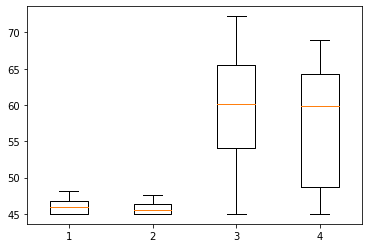

In [32]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

summ_df = pd.concat([capomulin_tumors, ramicane_tumors, infubinol_tumors, ceftamin_tumors], \
           keys=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

summ_df

plt.boxplot([capomulin_tumors, ramicane_tumors, infubinol_tumors, ceftamin_tumors])
plt.show()



## Line and Scatter Plots

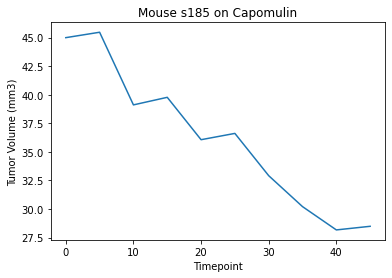

In [60]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capo_mask = df["Drug Regimen"] == "Capomulin"
capo_df = df[capo_mask]
capo_df.sort_values(by=["Mouse ID", "Timepoint"]).reset_index()

one_mouse = capo_df.iloc[10:20, 5:7]  # data for mouse s185

plt.plot(one_mouse["Timepoint"], one_mouse["Tumor Volume (mm3)"])
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")
plt.title("Mouse s185 on Capomulin")
plt.show()

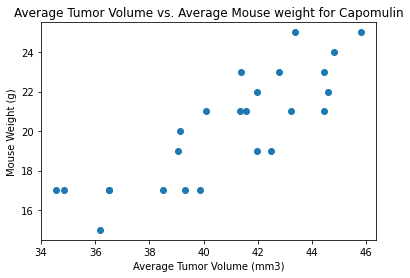

In [87]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

avg_tumvol = capo_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
avg_mousew = capo_df.groupby("Mouse ID")["Weight (g)"].mean()

plt.scatter(avg_tumvol, avg_mousew)
plt.xlabel("Average Tumor Volume (mm3)")
plt.ylabel("Mouse Weight (g)")
plt.title("Average Tumor Volume vs. Average Mouse Weight for Capomulin")
plt.show()

## Correlation and Regression

In [35]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

r_value = round(st.pearsonr(avg_tumvol, avg_mousew)[0], 2)

print(f"r-value = {r_value}")

# (slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_tumvol, avg_mousew)



r-value = 0.84


The r-squared is: 0.7055999999999999


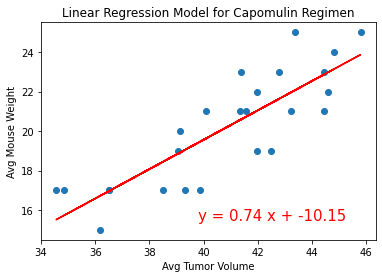

In [84]:
print(f"The r-squared is: {r_value**2}")

x_values = avg_tumvol
y_values = avg_mousew

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {str(round(slope,2))} x + {str(round(intercept,2))}"

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq, (39.8, 15.5), fontsize=15, color="red")

plt.xlabel('Avg Tumor Volume')
plt.ylabel('Avg Mouse Weight')
plt.title("Linear Regression Model for Capomulin Regimen")


plt.show()